In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle

from IPython.display import clear_output

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dropout
from keras.models import model_from_json

exec(open("utils.py").read())
exec(open("cnn-model.py").read())
exec(open("image_aug.py").read())

FTRAIN = 'training.csv'
FTEST = 'test.csv'
FIdLookup = 'IdLookupTable.csv'

Using TensorFlow backend.


In [2]:
## load data
X, y = load2d()
print("X.shape == {} y.shape == {}".format(X.shape, y.shape))

                        index     0
0           left_eye_center_x  7039
1           left_eye_center_y  7039
2          right_eye_center_x  7036
3          right_eye_center_y  7036
4     left_eye_inner_corner_x  2271
5     left_eye_inner_corner_y  2271
6     left_eye_outer_corner_x  2267
7     left_eye_outer_corner_y  2267
8    right_eye_inner_corner_x  2268
9    right_eye_inner_corner_y  2268
10   right_eye_outer_corner_x  2268
11   right_eye_outer_corner_y  2268
12   left_eyebrow_inner_end_x  2270
13   left_eyebrow_inner_end_y  2270
14   left_eyebrow_outer_end_x  2225
15   left_eyebrow_outer_end_y  2225
16  right_eyebrow_inner_end_x  2270
17  right_eyebrow_inner_end_y  2270
18  right_eyebrow_outer_end_x  2236
19  right_eyebrow_outer_end_y  2236
20                 nose_tip_x  7049
21                 nose_tip_y  7049
22        mouth_left_corner_x  2269
23        mouth_left_corner_y  2269
24       mouth_right_corner_x  2270
25       mouth_right_corner_y  2270
26     mouth_center_top_lip_

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(1712, 96, 96, 1)


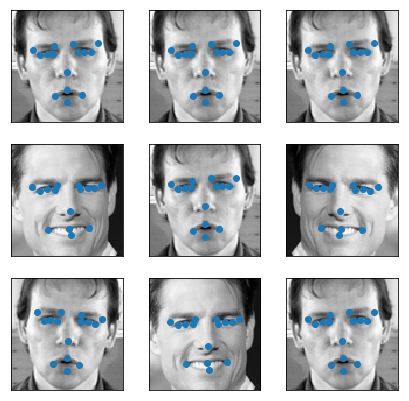

In [4]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator()
modifier = FlipPic()

fig = plt.figure(figsize=(7,7))

count = 1
for batch in generator.flow(X_train[:2],y_train[:2]):
    X_batch, y_batch = modifier.fit(*batch)

    ax = fig.add_subplot(3,3, count,xticks=[],yticks=[])  
    plot_sample(X_batch[0],y_batch[0],ax)
    count += 1
    if count == 10:
        break
plt.show()

In [5]:
%%time
model3 = SimpleCNN()
hist3 = fit_model(model3,
                  modifier,
                  train=(X_train,y_train),
                  validation=(X_val,y_val),
                  batch_size=32,
                  epochs=2000,
                  print_every=100)
clear_output()
print("done...", end=" ")

done... Wall time: 39min 38s


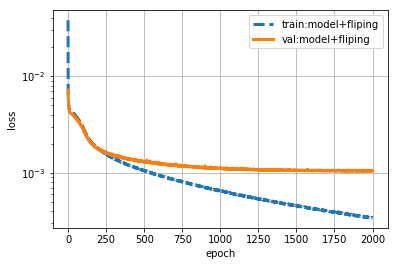

In [6]:
plot_loss(hist3,"model+fliping",plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [7]:
save_model(model3,"model-fliping")

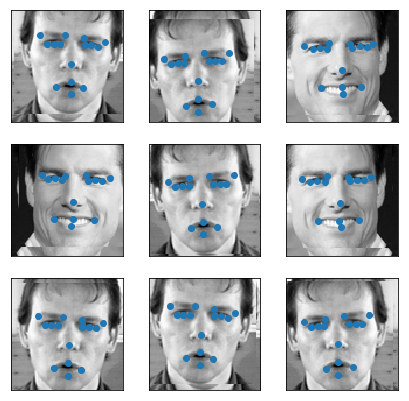

In [8]:
shiftFlipPic = ShiftFlipPic(prop=0.1)

fig = plt.figure(figsize=(7,7))

count = 1
for batch in generator.flow(X_train[:2],y_train[:2]):
    X_batch, y_batch = shiftFlipPic.fit(*batch)

    ax = fig.add_subplot(3,3, count,xticks=[],yticks=[])  
    plot_sample(X_batch[0],y_batch[0],ax)
    count += 1
    if count == 10:
        break
plt.show()

In [11]:
del model3

In [12]:
%%time
model4 = SimpleCNN()
hist4 = fit_model(model4,
                  shiftFlipPic,
                  train=(X_train,y_train),
                  validation=(X_val,y_val),
                  batch_size=32,
                  epochs=2000,
                  print_every=50,
                  patience=100)
clear_output()
print("done...", end=" ")

done... Wall time: 41min 42s


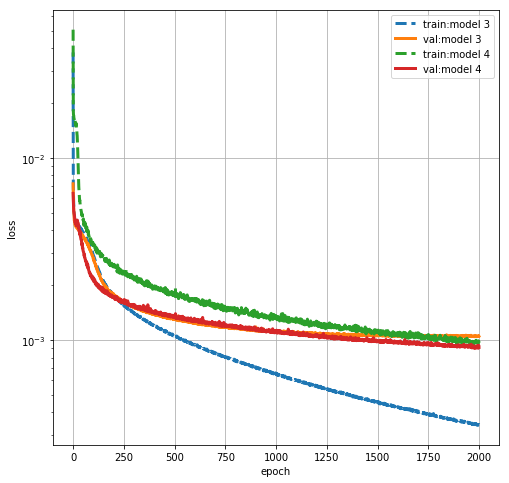

In [13]:
plt.figure(figsize=(8,8))
plot_loss(hist3,"model 3",plt)
plot_loss(hist4,"model 4",plt)

plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [16]:
save_model(model4,"model-fliping-shift")